In [8]:
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

In [46]:
def load_plot_data():
    
    (trainX, trainy), (testX, testy) = load_data()
    # summarize loaded dataset
    print('Train data: X=%s, y=%s' % (trainX.shape, trainy.shape))
    print('Test data: X=%s, y=%s' % (testX.shape, testy.shape))
    
    print('Few example images: ')
    # plot first few images
    for i in range(25):
        # define subplot
        pyplot.subplot(5, 5, i+1)
        # plot raw pixel data
        pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    # show the figure
    pyplot.show()
    
    return (trainX, trainy), (testX, testy)

In [47]:
def process_data(x_train, x_test):
    
    # reshape data to have a single channel
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
    
    # normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    return x_train, x_test

In [48]:
def create_model(x_train, y_train):
    
    # determine the shape of the input images
    in_shape = x_train.shape[1:]
    # determine the number of classes
    n_classes = len(unique(y_train))
    print('Shape of data: {} and number of unique classes: {}'.format(in_shape, n_classes))
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    # define loss and optimizer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [49]:
def fit_evaluate_model(model, x_train, y_train, x_test, y_test,):
    
    # fit the model
    model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
    # evaluate the model
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print('Accuracy on test data: %.3f' % acc)

In [53]:
def predict_model(model, x_test, y_test, testX):
    
    yhat = []
    for i in range(25):
        image = x_test[i]
        yhat.append(argmax(model.predict(asarray([image]))))
        
        # define subplot
        pyplot.subplot(5, 5, i+1)
        # plot raw pixel data
        pyplot.imshow(testX[i], cmap=pyplot.get_cmap('gray'))
    
    # show the figure
    print('Test images:')
    pyplot.show()
    print('Predicted outputs for the above test images: {}'.format(yhat))

In [54]:
def main():
    
    (trainX, trainy), (testX, testy) = load_plot_data()
    x_train, x_test = trainX, testX
    x_train, x_test = process_data(trainX, testX)
    
    model = create_model(x_train, trainy)
    fit_evaluate_model(model, x_train, trainy, x_test, testy)
    predict_model(model, x_test, testy, testX)

Train data: X=(60000, 28, 28), y=(60000,)
Test data: X=(10000, 28, 28), y=(10000,)
Few example images: 


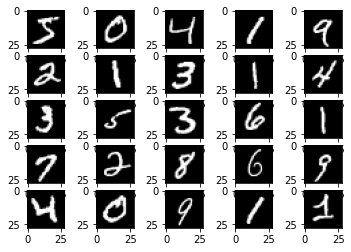

Shape of data: (28, 28, 1) and number of unique classes: 10
Accuracy on test data: 0.985
Test images:


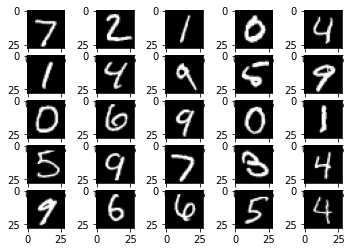

Predicted outputs for the above test images: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4]


In [55]:
if __name__ == '__main__':
    main()